## Classification task

Build a classifier that classifies the “TARGET” attribute. 

The classification goal is to predict whether a client has loan repayment difficulties or not (target attribute: “TARGET“ {(binary: 0, 1), 1--> client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample and 0--> all other cases}. 

You can do various data pre-processing and transformations (e.g. grouping values of attributes, converting them to binary, etc.), providing explanations for why you have chosen to do that. 

You may need to split the provided training set further into training, validation and/or test sets to accurately set the parameters and evaluate the quality of the classifier.
You can use KNIME to build classifiers, or feel free to use Python scikit-learn or other packages. 

If you do this, though, please explain more about your classifier - and be sure that you are producing valid results! 

You don't need to limit yourself to the classifiers we used in class, but if you do use other classifiers you need to describe them in your report and make sure you are producing valid results. 

At the very minimum, you need to produce a classifier for each method we have covered.

A hint: Usually it's not a case of having a 'better' classifier that will produce good results. Rather, it's a case of identifying or generating good features that can be used to solve the problem.

•	You need to build classifiers using the techniques covered in the lectures to predict the class attribute. 
•	At the very minimum, you need to produce a classifier for each method we have covered. 
•	However, if you explore the problem very thoroughly (as you should do in Industry), preprocessing the data, looking at different methods, choosing their best parameters settings, and identifying the best classifier in a principled and explainable way, then you should be able to get a better mark. 
•	If you show 'expert' use either KNIME or Python (i.e. exploring multiple classifiers, with different settings, choosing the best in a principled way, and being able to explain why you built the model the way you did), this will attract a better mark.


# 1. Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:

# set output display options to show all columns and rows

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [4]:
# Explore the training dataset

loan_data_training = pd.read_csv('loan_data_training.csv')

In [3]:
# shape of the dataset

loan_data_training.shape

(42452, 72)

In [23]:
loan_data_training.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100031       1         Cash loans           F            N   
2      100047       1         Cash loans           M            N   
3      100049       1         Cash loans           F            N   
4      100112       1         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               Y             0          112500.0    979992.0      27076.5   
2               Y             0          202500.0   1193580.0      35028.0   
3               N             0          135000.0    288873.0      16258.5   
4               Y             0          315000.0    953460.0      64107.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied               Working   
1         702000.0   Unaccompanied               Working   
2         855000.0   Unaccompanied  Commercial associate   
3         238500.0   Unaccompanied               Working   
4         900000.0          Family  Commercial associate   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1  Secondary / secondary special                 Widow  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4              Incomplete higher  Single / not married       With parents   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.018029      -18724          -2628            -6573.0   
2                    0.025164      -17482          -1262            -1182.0   
3                    0.007305      -13384          -3597              -45.0   
4                    0.030755      -10199          -2015            -4802.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1            -1827           1               1                0   
2            -1029           1               1                0   
3            -4409           1               1                1   
4            -1038           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           0           0              1.0   
2                 1           0           0              2.0   
3                 1           1           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     3                            2   
2                     2                            2   
3                     3                            3   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                        9   
2                    TUESDAY                        9   
3                   THURSDAY                       11   
4                     SUNDAY                       13   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                  

In [5]:
loan_data_training.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [20]:
loan_data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42452 entries, 0 to 42451
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   42452 non-null  int64  
 1   TARGET                       42452 non-null  int64  
 2   NAME_CONTRACT_TYPE           42452 non-null  object 
 3   CODE_GENDER                  42452 non-null  object 
 4   FLAG_OWN_CAR                 42452 non-null  object 
 5   FLAG_OWN_REALTY              42452 non-null  object 
 6   CNT_CHILDREN                 42452 non-null  int64  
 7   AMT_INCOME_TOTAL             42452 non-null  float64
 8   AMT_CREDIT                   42452 non-null  float64
 9   AMT_ANNUITY                  42451 non-null  float64
 10  AMT_GOODS_PRICE              42404 non-null  float64
 11  NAME_TYPE_SUITE              42293 non-null  object 
 12  NAME_INCOME_TYPE             42452 non-null  object 
 13  NAME_EDUCATION_T

In [7]:
loan_data_training.dtypes.value_counts()


int64      41
float64    20
object     11
Name: count, dtype: int64

In [17]:
# check for unique values in each attribute show as dataframe

loan_data_training.nunique().to_frame()



0
SK_ID_CURR                   42452
TARGET                           2
NAME_CONTRACT_TYPE               2
CODE_GENDER                      2
FLAG_OWN_CAR                     2
FLAG_OWN_REALTY                  2
CNT_CHILDREN                    10
AMT_INCOME_TOTAL               628
AMT_CREDIT                    3137
AMT_ANNUITY                   8121
AMT_GOODS_PRICE                498
NAME_TYPE_SUITE                  7
NAME_INCOME_TYPE                 7
NAME_EDUCATION_TYPE              5
NAME_FAMILY_STATUS               6
NAME_HOUSING_TYPE                6
REGION_POPULATION_RELATIVE      81
DAYS_BIRTH                   15057
DAYS_EMPLOYED                 7209
DAYS_REGISTRATION            12018
DAYS_ID_PUBLISH               5661
FLAG_MOBIL                       1
FLAG_EMP_PHONE                   2
FLAG_WORK_PHONE                  2
FLAG_CONT_MOBILE                 2
FLAG_PHONE                       2
FLAG_EMAIL                       2
CNT_FAM_MEMBERS                 12
REGION_RATING_CLIENT             3
REGION_RATING_CLIENT_W_CITY      3
WEEKDAY_APPR_PROCESS_START       7
HOUR_APPR_PROCESS_START         24
REG_REGION_NOT_LIVE_REGION       2
REG_REGION_NOT_WORK_REGION       2
LIVE_REGION_NOT_WORK_REGION      2
REG_CITY_NOT_LIVE_CITY           2
REG_CITY_NOT_WORK_CITY           2
LIVE_CITY_NOT_WORK_CITY          2
ORGANIZATION_TYPE               58
EXT_SOURCE_2                 35049
EXT_SOURCE_3                   759
OBS_30_CNT_SOCIAL_CIRCLE        28
DEF_30_CNT_SOCIAL_CIRCLE         7
OBS_60_CNT_SOCIAL_CIRCLE        27
DEF_60_CNT_SOCIAL_CIRCLE         6
DAYS_LAST_PHONE_CHANGE        3286
FLAG_DOCUMENT_2                  2
FLAG_DOCUMENT_3                  2
FLAG_DOCUMENT_4                  2
FLAG_DOCUMENT_5                  2
FLAG_DOCUMENT_6                  2
FLAG_DOCUMENT_7                  2
FLAG_DOCUMENT_8                  2
FLAG_DOCUMENT_9                  2
FLAG_DOCUMENT_10                 2
FLAG_DOCUMENT_11                 2
FLAG_DOCUMENT_12                 1
FLAG_DOCUMENT_13                 2
FLAG_DOCUMENT_14                 2
FLAG_DOCUMENT_15                 2
FLAG_DOCUMENT_16                 2
FLAG_DOCUMENT_17                 2
FLAG_DOCUMENT_18                 2
FLAG_DOCUMENT_19                 2
FLAG_DOCUMENT_20                 2
FLAG_DOCUMENT_21                 2
AMT_REQ_CREDIT_BUREAU_HOUR       3
AMT_REQ_CREDIT_BUREAU_DAY        6
AMT_REQ_CREDIT_BUREAU_WEEK       7
AMT_REQ_CREDIT_BUREAU_MON       19
AMT_REQ_CREDIT_BUREAU_QRT        9
AMT_REQ_CREDIT_BUREAU_YEAR      18

In [21]:
# show data for categorical attributes with unique value counts

loan_data_training.select_dtypes('object').nunique().to_frame()

0
NAME_CONTRACT_TYPE           2
CODE_GENDER                  2
FLAG_OWN_CAR                 2
FLAG_OWN_REALTY              2
NAME_TYPE_SUITE              7
NAME_INCOME_TYPE             7
NAME_EDUCATION_TYPE          5
NAME_FAMILY_STATUS           6
NAME_HOUSING_TYPE            6
WEEKDAY_APPR_PROCESS_START   7
ORGANIZATION_TYPE           58

In [8]:
loan_data_training[['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY
0         Cash loans           M            N               Y
1         Cash loans           F            N               Y
2         Cash loans           M            N               Y
3         Cash loans           F            N               N
4         Cash loans           M            Y               Y

In [9]:
# check for duplicates

loan_data_training.duplicated().sum()


0

In [17]:
# check for missing values rows

# loan_data_training.isnull().sum()

# show attributes with the missing values count greater than 0

loan_data_training.isnull().sum()[loan_data_training.isnull().sum() > 0].sort_values(ascending=False).to_frame()

0
EXT_SOURCE_3                8966
AMT_REQ_CREDIT_BUREAU_HOUR  6431
AMT_REQ_CREDIT_BUREAU_DAY   6431
AMT_REQ_CREDIT_BUREAU_WEEK  6431
AMT_REQ_CREDIT_BUREAU_MON   6431
AMT_REQ_CREDIT_BUREAU_QRT   6431
AMT_REQ_CREDIT_BUREAU_YEAR  6431
NAME_TYPE_SUITE              159
OBS_30_CNT_SOCIAL_CIRCLE     105
DEF_30_CNT_SOCIAL_CIRCLE     105
OBS_60_CNT_SOCIAL_CIRCLE     105
DEF_60_CNT_SOCIAL_CIRCLE     105
EXT_SOURCE_2                  91
AMT_GOODS_PRICE               48
AMT_ANNUITY                    1
CNT_FAM_MEMBERS                1

In [26]:
# check for outliers for all numerical and categorical attributes


stats = loan_data_training.describe()

# loan_data_training.describe()

# export to csv stats

stats.to_csv('stats.csv')




array([[<Axes: title={'center': 'SK_ID_CURR'}>,
        <Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>],
       [<Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>,
        <Axes: title={'center': 'DAYS_ID_PUBLISH'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>],
       [<Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'ce

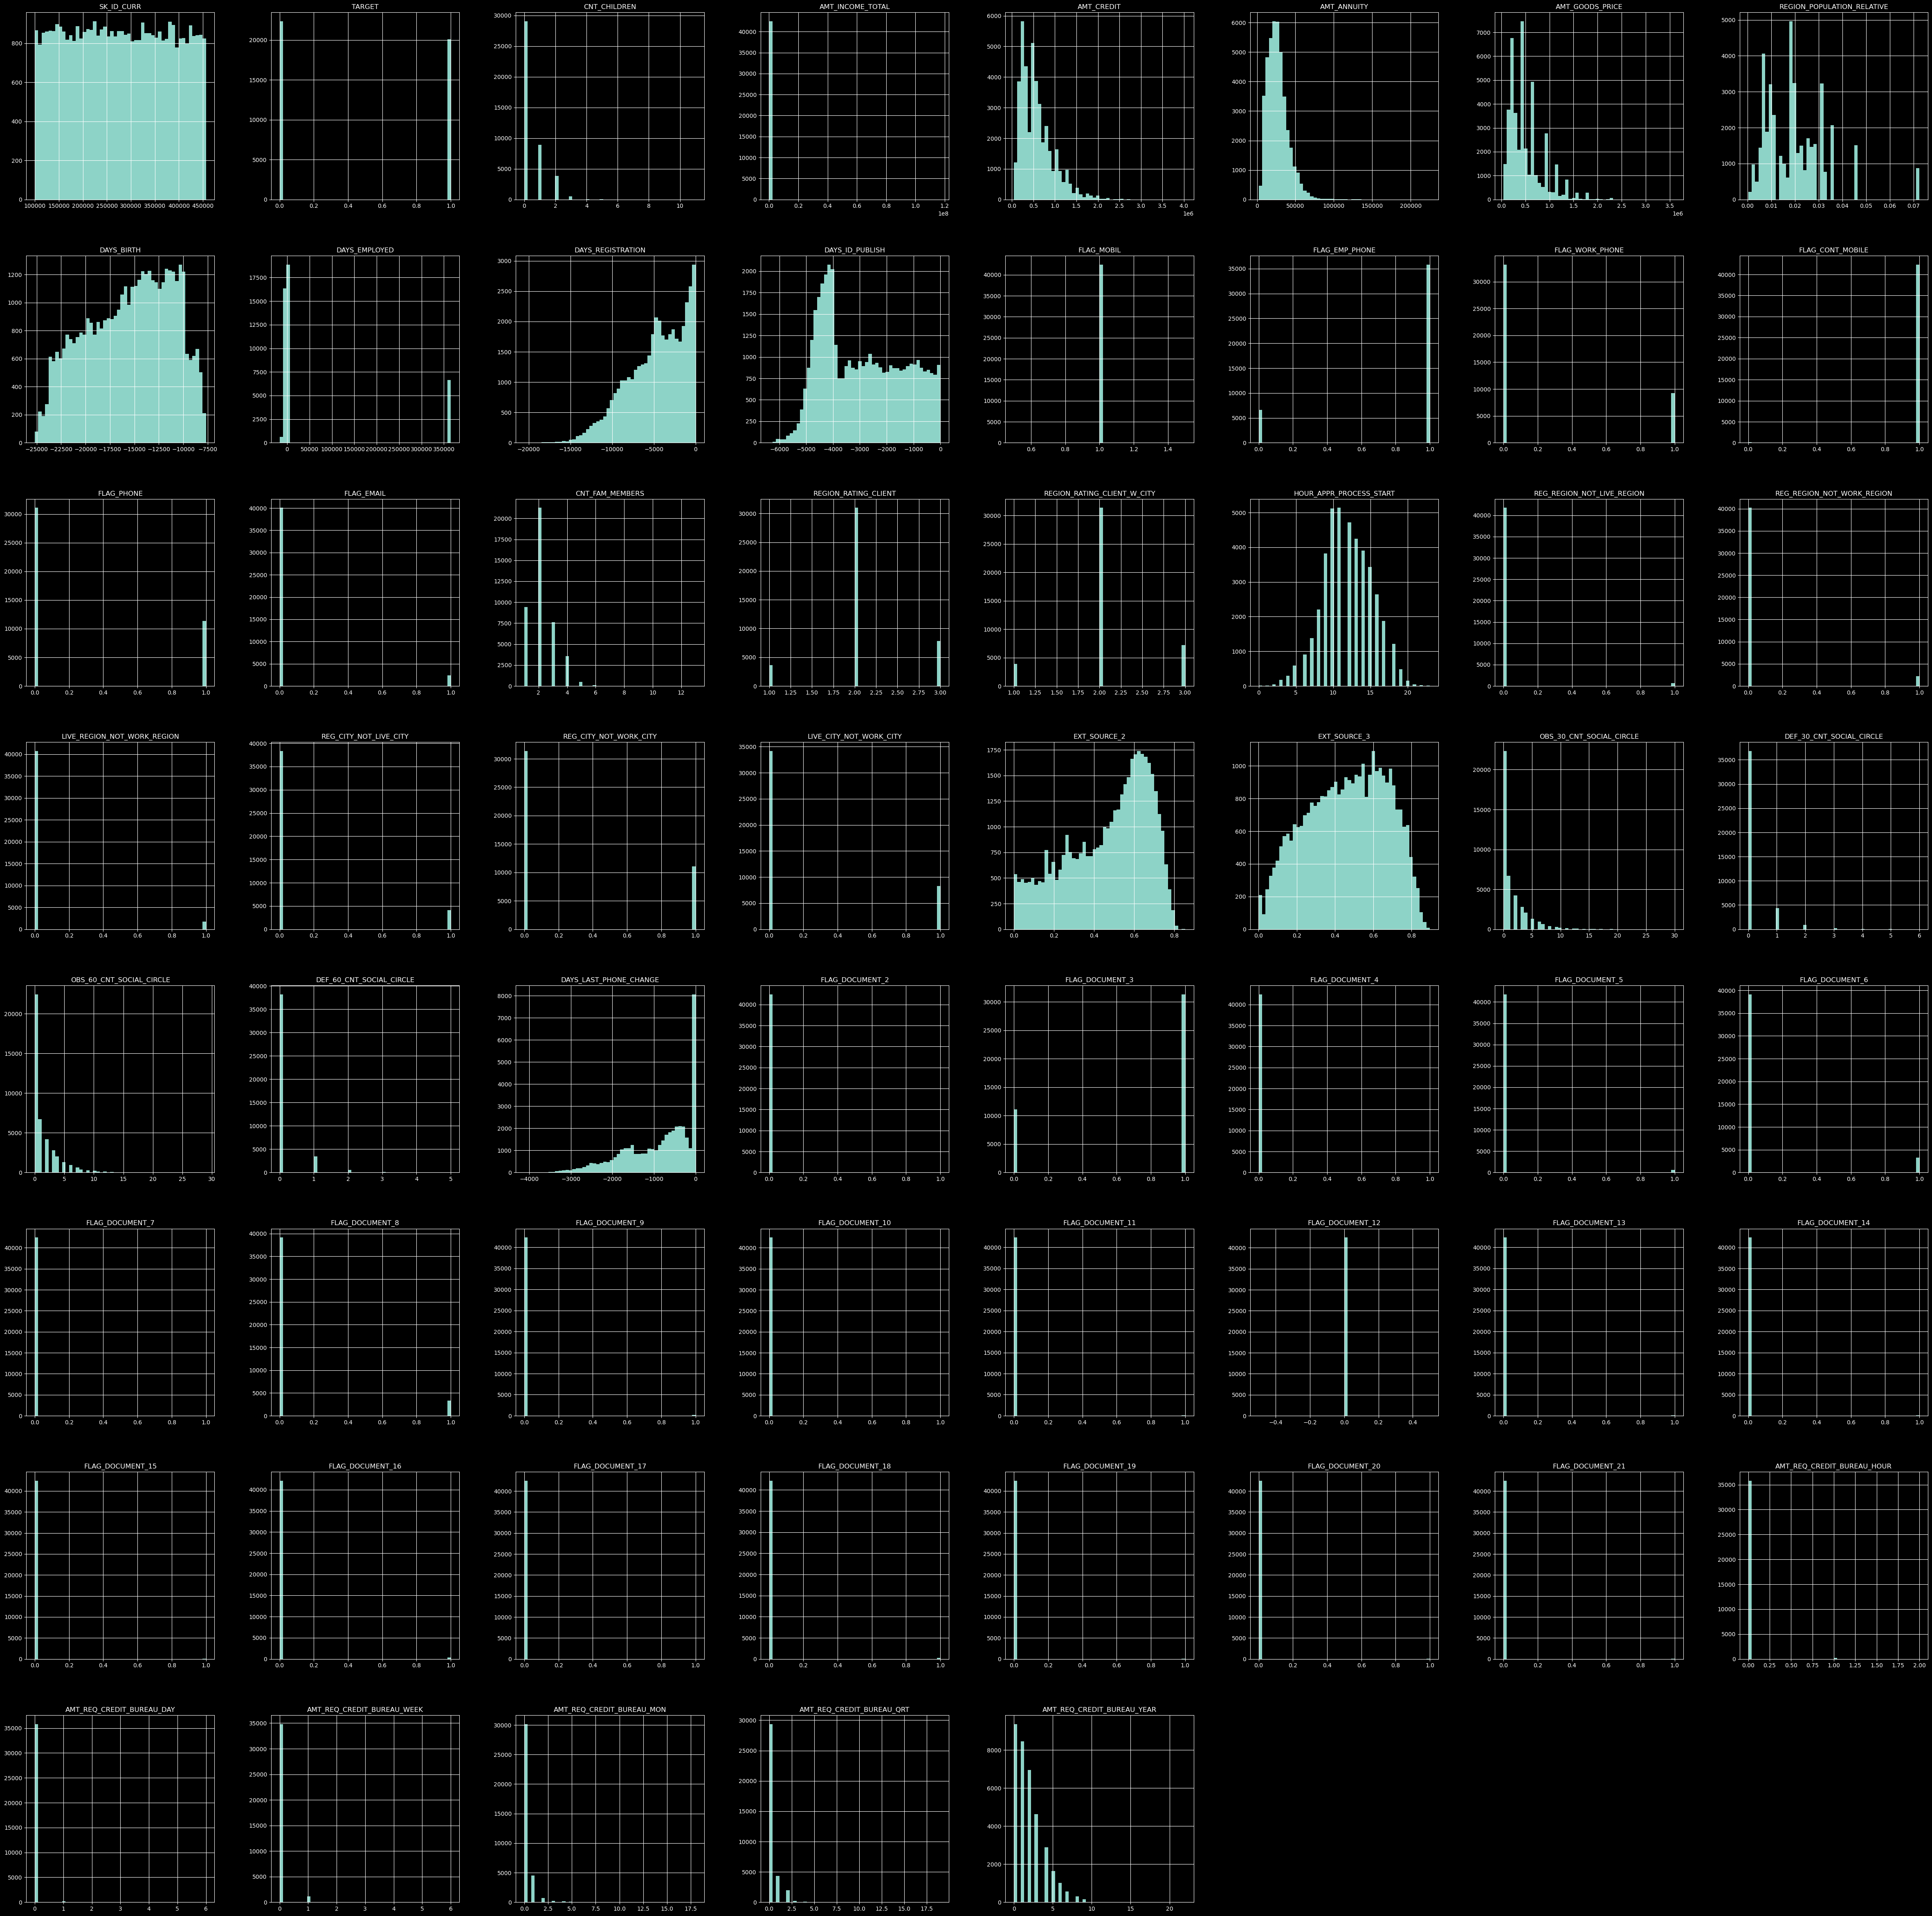

In [29]:
# plot histograms for each attribute in seaborn 

loan_data_training.hist(bins=50, figsize=(60,60))

In [ ]:
# pairplot 

sns.pairplot(loan_data_training)

In [5]:
# heatmap

plt.figure(figsize=(60,60))
sns.heatmap(loan_data_training.corr(), annot=True, cmap='coolwarm', linewidths=2)



ValueError: could not convert string to float: 'Cash loans'

<Figure size 6000x6000 with 0 Axes>

C:\Users\Lihini Nisansala\AppData\Local\Temp\ipykernel_26848\4293334244.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_data_training['DAYS_EMPLOYED'])


<Axes: >

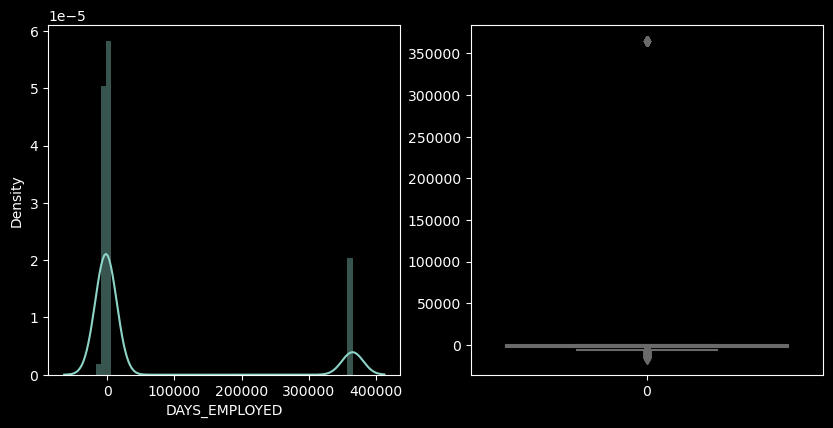

In [5]:
# histogram, boxplot for DAYS_EMPLOYED attribute

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)

sns.distplot(loan_data_training['DAYS_EMPLOYED'])

plt.subplot(2,2,2)

sns.boxplot(loan_data_training['DAYS_EMPLOYED'])

In [6]:
# check how many outliers in DAYS_EMPLOYED attribute

loan_data_training[loan_data_training['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].count()

6625

In [ ]:
# drop all the outliers in DAYS_EMPLOYED attribute from the dataset

loan_data_training = loan_data_training[loan_data_training['DAYS_EMPLOYED'] < 0]

In [ ]:
# Target Attribute - TARGET
# classes = [0, 1]

# 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in the loan_data_training.csv
# 0 - all other cases

In [ ]:
# https://towardsdatascience.com/how-to-automatically-design-an-efficient-neural-network-ee842a631885

# https://scikit-learn.org/stable/user_guide.html

### fda_at3
Automatically search for the neural network

min - classification models [use all]

feature reduction through information gain

Canvas materials:

4.9 Different measures of performance <br/>
4.11 Examples and features of the ROC


The classification goal is to predict whether a client has loan repayment difficulties or not (target attribute: “TARGET“ {(binary: 0, 1)
<br/>
1--> client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample 

<br/>
0--> all other cases}. 